In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the input matrix A
A = np.array(
    [
        [1, 1, 1, 0, 0],
        [3, 3, 3, 0, 0],
        [4, 4, 4, 0, 0],
        [5, 5, 5, 0, 0],
        [0, 0, 0, 4, 4],
        [0, 0, 0, 5, 5],
        [0, 0, 0, 2, 2],
    ],
    dtype=int,
)

print("Original Matrix A:")
print(A)
print(f"Shape: {A.shape}")

Original Matrix A:
[[1 1 1 0 0]
 [3 3 3 0 0]
 [4 4 4 0 0]
 [5 5 5 0 0]
 [0 0 0 4 4]
 [0 0 0 5 5]
 [0 0 0 2 2]]
Shape: (7, 5)


In [3]:
# Perform SVD decomposition
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print("\n" + "=" * 50)
print("SVD DECOMPOSITION: A = U * Σ * V^T")
print("=" * 50)

print("\nU matrix (left singular vectors):")
print(U)
print(f"Shape: {U.shape}")

print("\nSingular values (σ):")
print(sigma)
print(f"Shape: {sigma.shape}")

print("\nV^T matrix (right singular vectors transposed):")
print(Vt)
print(f"Shape: {Vt.shape}")

# Create the diagonal matrix Sigma for visualization
Sigma = np.zeros((U.shape[1], Vt.shape[0]))
np.fill_diagonal(Sigma, sigma)

print(f"\nΣ matrix (diagonal with singular values):")
print(Sigma)

# Verify the decomposition
A_reconstructed = U @ Sigma @ Vt
print(
    f"\nVerification - Reconstruction error: {np.linalg.norm(A - A_reconstructed):.2e}"
)


SVD DECOMPOSITION: A = U * Σ * V^T

U matrix (left singular vectors):
[[-0.14002801  0.          0.41748286 -0.56011203 -0.42008403]
 [-0.42008403  0.          0.15383647 -0.20639328  0.84520504]
 [-0.56011203  0.          0.20511529  0.72480896 -0.20639328]
 [-0.70014004  0.         -0.33989068 -0.3439888  -0.2579916 ]
 [ 0.         -0.59628479  0.64444444  0.          0.        ]
 [ 0.         -0.74535599 -0.44444444  0.          0.        ]
 [ 0.         -0.2981424  -0.17777778  0.          0.        ]]
Shape: (7, 5)

Singular values (σ):
[12.36931688  9.48683298  0.          0.          0.        ]
Shape: (5,)

V^T matrix (right singular vectors transposed):
[[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [-0.         -0.         -0.         -0.70710678 -0.70710678]
 [ 0.          0.          0.         -0.70710678  0.70710678]
 [ 0.         -0.70710678  0.70710678  0.          0.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]]
Shape: (5, 5

In [4]:
print("\n" + "=" * 50)
print("RANK AND NULL SPACE ANALYSIS")
print("=" * 50)

# Analyze the rank and singular values
rank = np.sum(sigma > 1e-10)  # Count non-zero singular values
print(f"Matrix rank: {rank}")
print(f"Number of non-zero singular values: {np.sum(sigma > 1e-10)}")
print(
    f"Condition number: {sigma[0]/sigma[-1] if sigma[-1] > 1e-10 else 'Infinite (singular)'}"
)


RANK AND NULL SPACE ANALYSIS
Matrix rank: 2
Number of non-zero singular values: 2
Condition number: Infinite (singular)


In [5]:
print("\n" + "=" * 50)
print("LEAST SQUARES APPLICATION")
print("=" * 50)

# Create a least squares problem: A * x = b
# Let's say we want to solve A * x = b where b is some target vector
np.random.seed(42)  # For reproducible results
b = np.array([2, 6, 8, 10, 8, 10, 4], dtype=float)  # Target vector

print(f"Target vector b: {b}")
print(f"We want to solve: A * x = b (in least squares sense)")

# Method 1: Using SVD to solve least squares
print(f"\nMethod 1: SVD-based solution")

# For least squares solution: x = V * Σ^(-1) * U^T * b
# But we need to handle zero/small singular values carefully

# Create pseudo-inverse using SVD
tolerance = 1e-10
sigma_inv = np.zeros_like(sigma)
for i in range(len(sigma)):
    if sigma[i] > tolerance:
        sigma_inv[i] = 1.0 / sigma[i]
    else:
        sigma_inv[i] = 0.0

# Construct the pseudo-inverse
A_pinv = Vt.T @ np.diag(sigma_inv) @ U.T

# Solve least squares
x_svd = A_pinv @ b

print(f"Solution x (using SVD): {x_svd}")

# Method 2: Using numpy's built-in least squares
x_lstsq, residuals, rank_lstsq, s = np.linalg.lstsq(A, b, rcond=None)
print(f"\nMethod 2: NumPy's lstsq solution")
print(f"Solution x (using lstsq): {x_lstsq}")
print(f"Residuals: {residuals}")

# Verify both solutions give the same result
print(f"\nSolution difference: {np.linalg.norm(x_svd - x_lstsq):.2e}")

# Calculate the residual and error
A_x_svd = A @ x_svd
residual_vector = b - A_x_svd
least_square_error = np.sum(residual_vector**2)

print(f"\nA * x (predicted): {A_x_svd}")
print(f"Residual (b - A*x): {residual_vector}")
print(f"Least square error: {least_square_error:.6f}")


LEAST SQUARES APPLICATION
Target vector b: [ 2.  6.  8. 10.  8. 10.  4.]
We want to solve: A * x = b (in least squares sense)

Method 1: SVD-based solution
Solution x (using SVD): [0.66666667 0.66666667 0.66666667 1.         1.        ]

Method 2: NumPy's lstsq solution
Solution x (using lstsq): [0.66666667 0.66666667 0.66666667 1.         1.        ]
Residuals: []

Solution difference: 2.22e-16

A * x (predicted): [ 2.  6.  8. 10.  8. 10.  4.]
Residual (b - A*x): [4.44089210e-16 1.77635684e-15 1.77635684e-15 1.77635684e-15
 2.66453526e-15 3.55271368e-15 1.33226763e-15]
Least square error: 0.000000



LOW-RANK APPROXIMATION
Using different numbers of singular values:
Rank-1 approximation error: 9.486833
Rank-2 approximation error: 0.000000
Rank-3 approximation error: 0.000000

VISUALIZATION


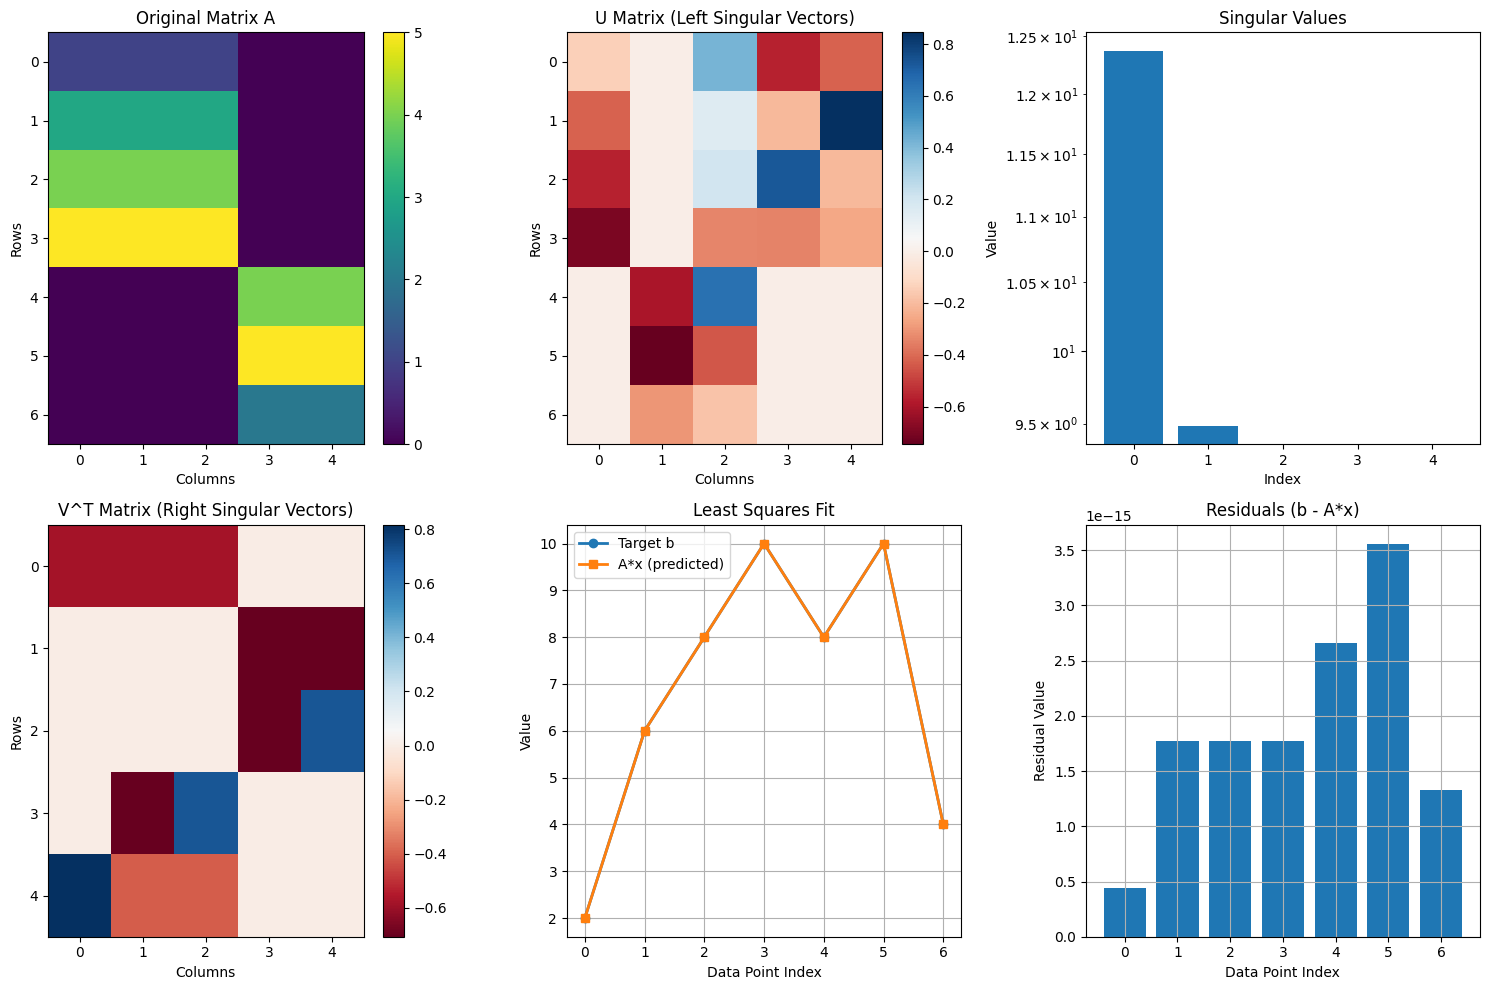

Analysis Complete!

Key Insights:
1. Matrix A has rank 2, meaning it has 2 linearly independent columns
2. SVD provides a numerically stable way to solve least squares problems
3. The pseudo-inverse handles rank-deficient cases automatically
4. Singular values tell us about the 'importance' of each dimension
5. Small singular values indicate near-linear dependencies


In [6]:


print("\n" + "=" * 50)
print("LOW-RANK APPROXIMATION")
print("=" * 50)

# Show how SVD can be used for low-rank approximation
print("Using different numbers of singular values:")

for k in [1, 2, 3]:
    if k <= len(sigma):
        # Reconstruct using only first k singular values
        A_k = U[:, :k] @ np.diag(sigma[:k]) @ Vt[:k, :]
        error_k = np.linalg.norm(A - A_k, "fro")  # Frobenius norm
        print(f"Rank-{k} approximation error: {error_k:.6f}")

print("\n" + "=" * 50)
print("VISUALIZATION")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot original matrix
im1 = axes[0, 0].imshow(A, cmap="viridis", aspect="auto")
axes[0, 0].set_title("Original Matrix A")
axes[0, 0].set_xlabel("Columns")
axes[0, 0].set_ylabel("Rows")
plt.colorbar(im1, ax=axes[0, 0])

# Plot U matrix
im2 = axes[0, 1].imshow(U, cmap="RdBu", aspect="auto")
axes[0, 1].set_title("U Matrix (Left Singular Vectors)")
axes[0, 1].set_xlabel("Columns")
axes[0, 1].set_ylabel("Rows")
plt.colorbar(im2, ax=axes[0, 1])

# Plot singular values
axes[0, 2].bar(range(len(sigma)), sigma)
axes[0, 2].set_title("Singular Values")
axes[0, 2].set_xlabel("Index")
axes[0, 2].set_ylabel("Value")
axes[0, 2].set_yscale("log")

# Plot V^T matrix
im4 = axes[1, 0].imshow(Vt, cmap="RdBu", aspect="auto")
axes[1, 0].set_title("V^T Matrix (Right Singular Vectors)")
axes[1, 0].set_xlabel("Columns")
axes[1, 0].set_ylabel("Rows")
plt.colorbar(im4, ax=axes[1, 0])

# Plot least squares comparison
axes[1, 1].plot(b, "o-", label="Target b", linewidth=2)
axes[1, 1].plot(A_x_svd, "s-", label="A*x (predicted)", linewidth=2)
axes[1, 1].set_title("Least Squares Fit")
axes[1, 1].set_xlabel("Data Point Index")
axes[1, 1].set_ylabel("Value")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Plot residuals
axes[1, 2].bar(range(len(residual_vector)), residual_vector)
axes[1, 2].set_title("Residuals (b - A*x)")
axes[1, 2].set_xlabel("Data Point Index")
axes[1, 2].set_ylabel("Residual Value")
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

print("Analysis Complete!")
print(f"\nKey Insights:")
print(
    f"1. Matrix A has rank {rank}, meaning it has {rank} linearly independent columns"
)
print(f"2. SVD provides a numerically stable way to solve least squares problems")
print(f"3. The pseudo-inverse handles rank-deficient cases automatically")
print(f"4. Singular values tell us about the 'importance' of each dimension")
print(f"5. Small singular values indicate near-linear dependencies")